In [1]:
import numpy as np
import pandas as pd

In [2]:
file = open("samplesCongCube.txt")
samplesCongCube = file.readlines()
file.close()

file = open("sampleCong.txt")
samplesCong = file.readlines()
file.close()

## Среднее, отклонение и коэффициент вариации

In [3]:
params = {"CONG_XOR": [], "CONG_CUBE": []}

In [4]:
for line in samplesCong:
    p = {}
    line = line.replace(" \n", "")
    sample = np.array(list(map(int, line.split(" "))))
    p["mean"] = round(sample.mean(), 3)
    p["std"] = round(sample.std(), 3)
    p["cv"] = round(p["std"] / p["mean"], 3)
    params["CONG_XOR"].append(p)

In [5]:
for line in samplesCongCube:
    p = {}
    line = line.replace(" \n", "")
    sample = np.array(list(map(int, line.split(" "))))
    p["mean"] = round(sample.mean(), 2)
    p["std"] = round(sample.std(), 2)
    p["cv"] = round(p["std"] / p["mean"], 2)
    params["CONG_CUBE"].append(p)

In [6]:
pd.options.display.float_format ='{:,.3f}'.format

In [33]:
df = {f'{i+1}': params["CONG_XOR"][i].values() for i in range(20)}
df = pd.DataFrame(data=df, index=params['CONG_XOR'][0])
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
mean,"1,118,556,390.330","1,140,955,613.920","1,125,739,970.520","1,027,540,850.580","1,079,252,780.330","1,130,928,580.590","1,121,178,527.720","1,019,584,019.640","935,803,772.290","997,595,342.320","1,056,456,514.040","1,005,810,470.900","1,153,955,613.630","1,071,429,926.410","1,136,826,852.510","991,532,065.930","1,171,088,793.590","1,100,321,351.980","1,074,005,720.840","1,147,852,394.820"
std,"640,276,255.978","645,291,501.218","607,773,799.720","625,645,315.310","593,357,340.963","617,715,535.678","619,087,269.389","656,992,598.306","576,741,682.533","623,784,252.973","616,012,123.095","589,480,940.530","623,089,301.323","597,089,452.091","587,023,008.869","622,769,451.005","575,746,240.492","660,857,677.830","598,409,813.097","635,176,323.901"
cv,0.572,0.566,0.540,0.609,0.550,0.546,0.552,0.644,0.616,0.625,0.583,0.586,0.540,0.557,0.516,0.628,0.492,0.601,0.557,0.553


In [34]:
df = {f'{i+1}': params["CONG_CUBE"][i].values() for i in range(20)}
df = pd.DataFrame(data=df, index=params['CONG_CUBE'][0])
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
mean,"1,015,161,132.450","1,105,775,556.130","1,043,311,421.280","1,053,114,978.390","1,092,282,335.870","1,041,384,225.650","980,513,545.050","1,049,358,945.820","1,097,741,569.860","1,175,624,153.760","1,142,660,319.150","1,068,924,110.440","1,066,858,960.420","1,020,120,869.110","1,236,302,221.720","1,033,403,432.980","1,057,157,956.860","1,098,384,529.410","1,047,938,808.320","1,043,651,859.400"
std,"601,620,111.480","600,829,294.510","665,728,461.740","604,717,018.490","620,547,647.080","629,714,618.400","619,848,182.780","624,151,288.160","611,418,815.930","606,726,822.510","584,575,765.460","574,228,358.050","604,348,987.940","577,466,664.250","566,424,162.110","603,678,942.750","652,997,474.550","647,633,855.670","621,340,846.210","634,045,076.100"
cv,0.590,0.540,0.640,0.570,0.570,0.600,0.630,0.590,0.560,0.520,0.510,0.540,0.570,0.570,0.460,0.580,0.620,0.590,0.590,0.610


### Критерий хи квадрат

Выборка принимает значения от 0 до 2147483647

Оптимальное числое интервалов определяется с помомщью формулы (1+log_2(sampleSize))

In [9]:
samples_size = 100
count_intervals = round(1+np.log2(samples_size))
print(count_intervals)

8


In [10]:
leng = 2147483647 // count_intervals
x = [i*leng for i in range(0, count_intervals+1)]
x

[0,
 268435455,
 536870910,
 805306365,
 1073741820,
 1342177275,
 1610612730,
 1879048185,
 2147483640]

In [11]:
chi_stat = {"CONG_XOR": [], "CONG_CUBE": []}

In [12]:
def countChiStat(sample, type):
    count = [0]*(len(x))
    n = len(sample)
    for elem in sample:
        for i in range(1, len(x)):
            if elem <= x[i] and elem >=x[i-1]:
                count[i] += 1
    sum = 0
    for i in range(1, count_intervals+1):
        sum += count_intervals * np.power(count[i], 2)
    chi_stat[type].append(round(sum/samples_size-samples_size, 3))

In [13]:
for line in samplesCong:
    line = line.replace(" \n", "")
    sample = list(map(int, line.split(" ")))
    countChiStat(sample, "CONG_XOR")

In [14]:
for line in samplesCongCube:
    line = line.replace(" \n", "")
    sample = list(map(int, line.split(" ")))
    countChiStat(sample, "CONG_CUBE")

In [15]:
print(chi_stat)

{'CONG_XOR': [4.48, 3.68, 4.32, 3.36, 2.56, 4.48, 6.4, 4.64, 10.08, 5.76, 4.0, 4.16, 7.84, 8.0, 4.64, 4.8, 9.12, 5.12, 6.56, 3.52], 'CONG_CUBE': [3.36, 4.0, 11.36, 4.8, 2.08, 3.68, 6.56, 3.52, 5.28, 5.12, 8.48, 4.96, 18.72, 7.68, 10.4, 10.4, 4.32, 8.96, 10.08, 12.64]}


In [16]:
percents = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
percent_points = np.array([1.239, 2.167, 4.255, 6.346, 9.037, 14.07, 18.48])

In [30]:
for i, stat in enumerate(chi_stat["CONG_XOR"]):
    if (stat < percent_points[0]) or (stat > percent_points[-1]):
        print(f"Выборка №{i+1} противоречит гипотезе о случайности и равномерности ГПСЧ")
    else:
        print(f"Выборка №{i+1} не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью {int(percents[np.argmin(abs(percent_points - stat))]*100)} %")
    

Выборка №1 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №2 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №3 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №4 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №5 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 5 %
Выборка №6 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №7 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 50 %
Выборка №8 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №9 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 75 %
Выборка №10 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 50 %
Выборка №11 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 

In [32]:
for i, stat in enumerate(chi_stat["CONG_CUBE"]):
    if (stat < percent_points[0]) or (stat > percent_points[-1]):
        print(f"Выборка №{i+1} противоречит гипотезе о случайности и равномерности ГПСЧ")
    else:
        print(f"Выборка №{i+1} не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью {int(percents[np.argmin(abs(percent_points - stat))] *100)} %")
    

Выборка №1 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №2 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №3 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 75 %
Выборка №4 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №5 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 5 %
Выборка №6 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №7 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 50 %
Выборка №8 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №9 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №10 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 25 %
Выборка №11 не противоречит гипотезе о случайности и равномерности ГПСЧ с вероятностью 75 

### Время

In [19]:
file = open("timestamps.txt")
times = file.readlines()
file.close()

In [20]:
sizes = []
times_xor = []
times_cube = []
times_std = []

for line in times:
    line = line.replace(" \n", "")

    size, time_cong_xor, time_cong_cube, time_std = map(int, line.split(" "))
    sizes.append(size)
    times_xor.append(time_cong_xor)
    times_cube.append(time_cong_cube)
    times_std.append(time_std)

In [21]:
import matplotlib.pyplot as plt

In [22]:
times_cube = np.log(np.array(times_cube))
times_std = np.log(np.array(times_std))
times_xor = np.log(np.array(times_xor))


times_cube

array([6.47543272, 6.49677499, 7.69165682, 8.00168998, 7.52402142,
       7.82164313])

In [23]:
plt.rcParams ['figure.figsize'] = [5, 10]


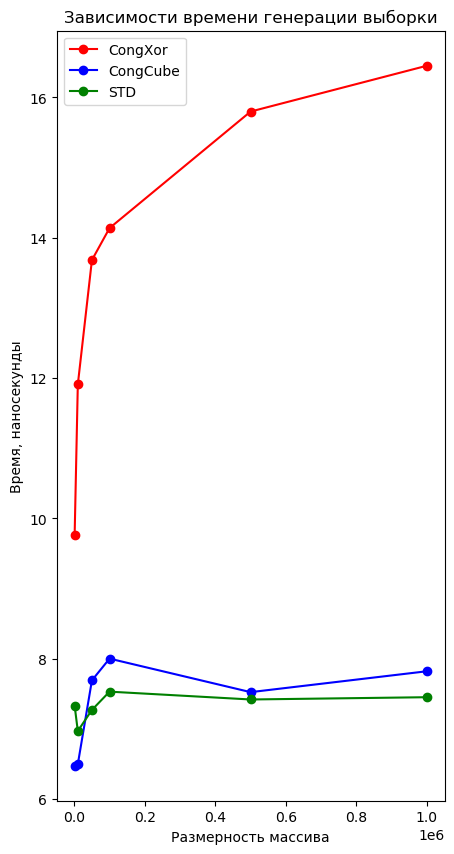

In [24]:
plt.title("Зависимости времени генерации выборки")
plt.xlabel("Размерность массива")
plt.ylabel("Время, наносекунды")
plt.plot(sizes, times_xor, color="r", marker="o")
plt.plot(sizes, times_cube, color="b", marker="o")
plt.plot(sizes, times_std, color="g", marker="o")
plt.legend(["CongXor", "CongCube", "STD"])
plt.show()

### DierHard

In [25]:
line_1 = samplesCong[0]
line_1 = line_1.replace(" \n", "").replace(" ", "\n")
file = open("sampleCongDiehard.txt", "w")
file.write(line_1)
file.close()

In [26]:
line_1 = samplesCongCube[0]
line_1 = line_1.replace(" \n", "").replace(" ", "\n")
file = open("sampleCongCubeDiehard.txt", "w")
file.write(line_1)
file.close()

Проверка тестом Diehard кубического генератора

#=============================================================================#

\#            dieharder version 3.31.1 Copyright 2003 Robert G. Brown          #

#=============================================================================#

rng\_name    |           filename             |rands/second|

mt19937|       sampleCongCubeDiehard.txt|  7.82e+07  |

#=============================================================================#

test\_name   |ntup| tsamples |psamples|  p-value |Assessment

#=============================================================================#

diehard\_birthdays|   0|       100|     100|0.75693146|  PASSED

diehard\_operm5|   0|   1000000|     100|0.34370603|  PASSED

diehard\_rank\_32x32|   0|     40000|     100|0.08607894|  PASSED

diehard\_rank\_6x8|   0|    100000|     100|0.98055970|  PASSED

diehard\_bitstream|   0|   2097152|     100|0.54369141|  PASSED

diehard\_opso|   0|   2097152|     100|0.56450429|  PASSED

diehard\_oqso|   0|   2097152|     100|0.97425425|  PASSED

diehard\_dna|   0|   2097152|     100|0.66788381|  PASSED

diehard\_count\_1s\_str|   0|    256000|     100|0.30410248|  PASSED

diehard\_count\_1s\_byt|   0|    256000|     100|0.05238663|  PASSED

diehard\_parking\_lot|   0|     12000|     100|0.92308018|  PASSED

diehard\_2dsphere|   2|      8000|     100|0.48016075|  PASSED

diehard\_3dsphere|   3|      4000|     100|0.98953597|  PASSED

diehard\_squeeze|   0|    100000|     100|0.68046635|  PASSED

diehard\_sums|   0|       100|     100|0.08829665|  PASSED

diehard\_runs|   0|    100000|     100|0.58372756|  PASSED

diehard\_runs|   0|    100000|     100|0.97437158|  PASSED

diehard\_craps|   0|    200000|     100|0.52338151|  PASSED

diehard\_craps|   0|    200000|     100|0.64370248|  PASSED


### Diehard для обычного конгруэнтного с XOR

#=============================================================================#

\#            dieharder version 3.31.1 Copyright 2003 Robert G. Brown          #

#=============================================================================#

rng\_name    |           filename             |rands/second|

mt19937|           sampleCongDiehard.txt|  1.31e+08  |

#=============================================================================#

test\_name   |ntup| tsamples |psamples|  p-value |Assessment

#=============================================================================#

diehard\_birthdays|   0|       100|     100|0.59943514|  PASSED

diehard\_operm5|   0|   1000000|     100|0.22005638|  PASSED

diehard\_rank\_32x32|   0|     40000|     100|0.15272452|  PASSED

diehard\_rank\_6x8|   0|    100000|     100|0.94626846|  PASSED

diehard\_bitstream|   0|   2097152|     100|0.35362321|  PASSED

diehard\_opso|   0|   2097152|     100|0.81585795|  PASSED

diehard\_oqso|   0|   2097152|     100|0.21085178|  PASSED

diehard\_dna|   0|   2097152|     100|0.80001658|  PASSED

diehard\_count\_1s\_str|   0|    256000|     100|0.75214128|  PASSED

diehard\_count\_1s\_byt|   0|    256000|     100|0.80760754|  PASSED

diehard\_parking\_lot|   0|     12000|     100|0.50512183|  PASSED

diehard\_2dsphere|   2|      8000|     100|0.65072356|  PASSED

diehard\_3dsphere|   3|      4000|     100|0.34089291|  PASSED

diehard\_squeeze|   0|    100000|     100|0.15187324|  PASSED

diehard\_sums|   0|       100|     100|0.18203887|  PASSED

diehard\_runs|   0|    100000|     100|0.86406667|  PASSED

diehard\_runs|   0|    100000|     100|0.92828109|  PASSED

diehard\_craps|   0|    200000|     100|0.55585713|  PASSED

diehard\_craps|   0|    200000|     100|0.31520968|  PASSED
